In [197]:
import pandas as pd
import numpy as np

# ML
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Explainability
import shap

# Utilities
import warnings
warnings.filterwarnings("ignore")

# Reproducibility
RANDOM_STATE = 42


In [198]:
co2_df = pd.read_csv("../data/owid-co2-data.csv")
energy_df = pd.read_csv("../data/owid-energy-data.csv")

print("CO2 dataset shape:", co2_df.shape)
print("Energy dataset shape:", energy_df.shape)

CO2 dataset shape: (50411, 79)
Energy dataset shape: (23195, 130)


In [199]:
co2_df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [200]:
energy_df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


In [201]:
print("CO2 columns:")
print(co2_df.columns.tolist())

print("\nEnergy columns:")
print(energy_df.columns.tolist())

CO2 columns:
['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2', 'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct', 'co2_including_luc', 'co2_including_luc_growth_abs', 'co2_including_luc_growth_prct', 'co2_including_luc_per_capita', 'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy', 'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2', 'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita', 'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2', 'cumulative_co2_including_luc', 'cumulative_coal_co2', 'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2', 'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita', 'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2', 'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita', 'land_use_change_co2', 'land_use_change_co2_per_capita', 'methane', 'methane_per_capita', 'nitrous_oxide', 'nitrous_oxide_

In [202]:
# Filter for India
co2_india = co2_df[co2_df["country"] == "India"].copy()
energy_india = energy_df[energy_df["country"] == "India"].copy()

print("CO2 India shape:", co2_india.shape)
print("Energy India shape:", energy_india.shape)

CO2 India shape: (175, 79)
Energy India shape: (125, 130)


In [203]:
co2_india = co2_india.sort_values("year").reset_index(drop=True)
energy_india = energy_india.sort_values("year").reset_index(drop=True)

In [204]:
co2_years = set(co2_india["year"])
energy_years = set(energy_india["year"])

common_years = sorted(co2_years.intersection(energy_years))

print("Common year range:", min(common_years), "-", max(common_years))
print("Number of common years:", len(common_years))


Common year range: 1900 - 2024
Number of common years: 125


In [205]:
co2_india = co2_india[co2_india["year"].isin(common_years)].reset_index(drop=True)
energy_india = energy_india[energy_india["year"].isin(common_years)].reset_index(drop=True)

print("Aligned CO2 shape:", co2_india.shape)
print("Aligned Energy shape:", energy_india.shape)


Aligned CO2 shape: (125, 79)
Aligned Energy shape: (125, 130)


In [206]:
assert all(co2_india["year"].values == energy_india["year"].values)

In [207]:
energy_features = [
    "year",
    "energy_per_capita",
    "fossil_energy_per_capita",
    "renewables_share_energy",
    "energy_per_gdp"
]

energy_india_final = energy_india[energy_features].copy()

co2_india_final = co2_india[['co2_per_capita', 'year']].copy()

co2_india_final.head(), energy_india_final.head()


(   co2_per_capita  year
 0           0.042  1900
 1           0.047  1901
 2           0.051  1902
 3           0.052  1903
 4           0.058  1904,
    year  energy_per_capita  fossil_energy_per_capita  renewables_share_energy  \
 0  1900                NaN                       NaN                      NaN   
 1  1901                NaN                       NaN                      NaN   
 2  1902                NaN                       NaN                      NaN   
 3  1903                NaN                       NaN                      NaN   
 4  1904                NaN                       NaN                      NaN   
 
    energy_per_gdp  
 0             NaN  
 1             NaN  
 2             NaN  
 3             NaN  
 4             NaN  )

# data cleaning

In [208]:
energy_india_final.isna().sum()

year                         0
energy_per_capita           65
fossil_energy_per_capita    65
renewables_share_energy     65
energy_per_gdp              67
dtype: int64

In [209]:
energy_india_final.dropna(inplace=True)
energy_india_final.info()


<class 'pandas.DataFrame'>
RangeIndex: 58 entries, 65 to 122
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      58 non-null     int64  
 1   energy_per_capita         58 non-null     float64
 2   fossil_energy_per_capita  58 non-null     float64
 3   renewables_share_energy   58 non-null     float64
 4   energy_per_gdp            58 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.4 KB


In [210]:
co2_india_final.isna().sum()

co2_per_capita    0
year              0
dtype: int64

In [211]:
co2_india_final.info()

<class 'pandas.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   co2_per_capita  125 non-null    float64
 1   year            125 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 2.1 KB


In [212]:
drivers = [
    "energy_per_capita",
    "fossil_energy_per_capita",
    "renewables_share_energy",
    "energy_per_gdp"
]

energy_india_final.head()

,year,energy_per_capita,fossil_energy_per_capita,renewables_share_energy,energy_per_gdp
65,1965,1263.825,1148.192,8.643,1.039
66,1966,1274.940,1156.744,8.758,1.062
67,1967,1286.993,1157.539,9.507,1.012
68,1968,1346.781,1200.554,10.267,1.054
69,1969,1461.818,1299.008,10.283,1.095


In [213]:
from sklearn.linear_model import LinearRegression

X_year = energy_india_final[['year']]

driver_models = {}                 
driver_predictions = pd.DataFrame({
    "year": energy_india_final["year"]
})

In [214]:
for driver in drivers:
    y = energy_india_final[driver]
    
    model = LinearRegression()
    model.fit(X_year, y)
    
    # Save model
    driver_models[driver] = model
    
    # Predict on historical years (sanity check)
    driver_predictions[driver] = model.predict(X_year)


In [215]:
for driver, model in driver_models.items():
    print(
        f"{driver}: "
        f"coefficient={model.coef_[0]:.4f}, "
        f"intercept={model.intercept_:.2f}"
    )

energy_per_capita: coefficient=101.0371, intercept=-198105.35
fossil_energy_per_capita: coefficient=93.2602, intercept=-182906.36
renewables_share_energy: coefficient=-0.0883, intercept=184.56
energy_per_gdp: coefficient=-0.0005, intercept=2.23


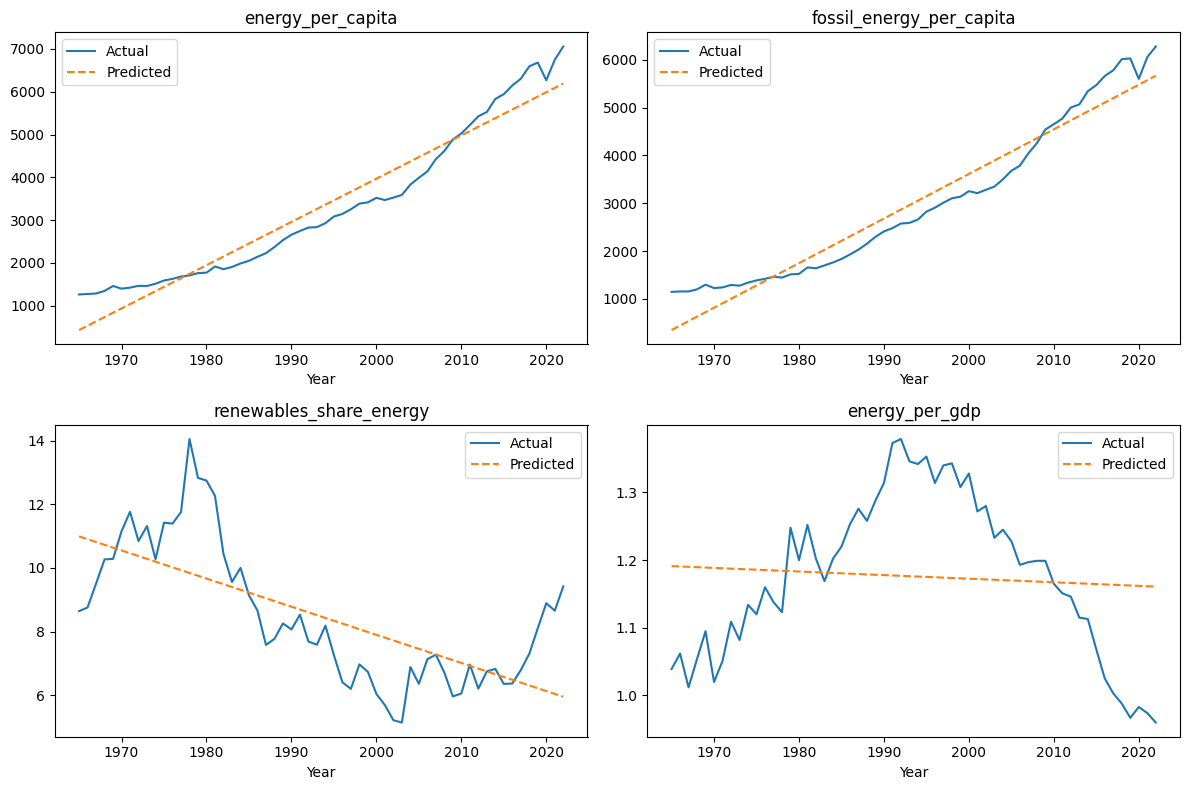

In [216]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for ax, driver in zip(axes, drivers):
    ax.plot(
        energy_india_final["year"],
        energy_india_final[driver],
        label="Actual"
    )
    ax.plot(
        driver_predictions["year"],
        driver_predictions[driver],
        linestyle="--",
        label="Predicted"
    )
    ax.set_title(driver)
    ax.set_xlabel("Year")
    ax.legend()

plt.tight_layout()
plt.show()

In [217]:
import joblib

joblib.dump(driver_models, "driver_models.pkl")

['driver_models.pkl']

In [218]:
# Get years where drivers are available
valid_years = set(energy_india_final["year"])

co2_aligned_df = co2_india_final[
    co2_india_final["year"].isin(valid_years)
][["year", "co2_per_capita"]].reset_index(drop=True)

print("CO2 aligned shape:", co2_aligned_df.shape)
co2_aligned_df.head()


CO2 aligned shape: (58, 2)


,year,co2_per_capita
0,1965,0.314
1,1966,0.318
2,1967,0.312
3,1968,0.333
4,1969,0.332


In [219]:
model_df = energy_india_final.merge(
    co2_aligned_df,
    on="year",
    how="inner"
)

print("Final modeling shape:", model_df.shape)
model_df.head()

Final modeling shape: (58, 6)


,year,energy_per_capita,fossil_energy_per_capita,renewables_share_energy,energy_per_gdp,co2_per_capita
0,1965,1263.825,1148.192,8.643,1.039,0.314
1,1966,1274.940,1156.744,8.758,1.062,0.318
2,1967,1286.993,1157.539,9.507,1.012,0.312
3,1968,1346.781,1200.554,10.267,1.054,0.333
4,1969,1461.818,1299.008,10.283,1.095,0.332


In [220]:
features = [
    "energy_per_capita",
    "fossil_energy_per_capita",
    "renewables_share_energy",
    "energy_per_gdp"
]

X = model_df[features]
y = model_df["co2_per_capita"]

In [221]:
split_idx = int(len(model_df) * 0.8)

X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

print("Train size:", X_train.shape)
print("Test size :", X_test.shape)


Train size: (46, 4)
Test size : (12, 4)


In [222]:
from sklearn.linear_model import ElasticNet

co2_model = ElasticNet(
    alpha=0.01,   # ↓ from 0.1
    l1_ratio=0.3, # less Lasso
    random_state=42
)

co2_model.fit(X_train, y_train)


,"alpha alpha: float, default=1.0Constant that multiplies the penalty terms. Defaults to 1.0.See the notes for the exact mathematical meaning of thisparameter. ``alpha = 0`` is equivalent to an ordinary least square,solved by the :class:`LinearRegression` object. For numericalreasons, using ``alpha = 0`` with the ``Lasso`` object is not advised.Given this, you should use the :class:`LinearRegression` object.",0.01
,"l1_ratio l1_ratio: float, default=0.5The ElasticNet mixing parameter, with ``0 <= l1_ratio <= 1``. For``l1_ratio = 0`` the penalty is an L2 penalty. ``For l1_ratio = 1`` itis an L1 penalty. For ``0 < l1_ratio < 1``, the penalty is acombination of L1 and L2.",0.3
,"fit_intercept fit_intercept: bool, default=TrueWhether the intercept should be estimated or not. If ``False``, thedata is assumed to be already centered.",True
,"precompute precompute: bool or array-like of shape (n_features, n_features), default=FalseWhether to use a precomputed Gram matrix to speed upcalculations. The Gram matrix can also be passed as argument.For sparse input this option is always ``False`` to preserve sparsity.Check :ref:`an example on how to use a precomputed Gram Matrix in ElasticNet`for details.",False
,"max_iter max_iter: int, default=1000The maximum number of iterations.",1000
,"copy_X copy_X: bool, default=TrueIf ``True``, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-4The tolerance for the optimization: if the updates are smaller or equal to``tol``, the optimization code checks the dual gap for optimality and continuesuntil it is smaller or equal to ``tol``, see Notes below.",0.0001
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fit asinitialization, otherwise, just erase the previous solution.See :term:`the Glossary `.",False
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive.",False
,"random_state random_state: int, RandomState instance, default=NoneThe seed of the pseudo random number generator that selects a randomfeature to update. Used when ``selection`` == 'random'.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",42
,"selection selection: {'cyclic', 'random'}, default='cyclic'If set to 'random', a random coefficient is updated every iterationrather than looping over features sequentially by default. This(setting to 'random') often leads to significantly faster convergenceespecially when tol is higher than 1e-4.",'cyclic'


In [223]:
# After training co2_model
print("Model coefficients:")
for feature, coef in zip(features, co2_model.coef_):
    print(f"{feature}: {coef}")

Model coefficients:
energy_per_capita: 0.00016167784679843
fossil_energy_per_capita: 0.00012353215013986038
renewables_share_energy: -0.001080046472234663
energy_per_gdp: 0.0


In [224]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_pred = co2_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE : {mae:.3f}")
print(f"RMSE: {rmse:.3f}")


MAE : 0.082
RMSE: 0.088


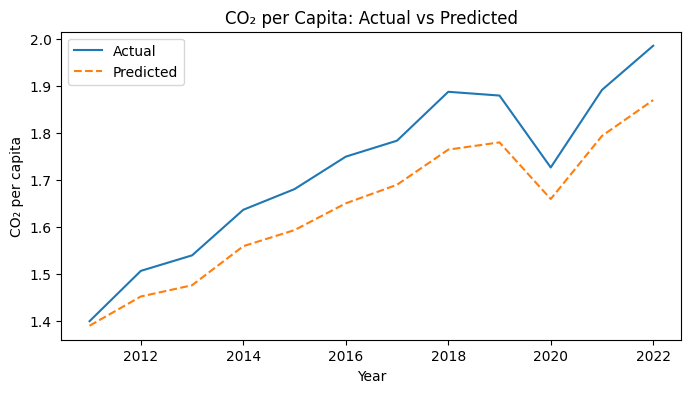

In [225]:
plt.figure(figsize=(8, 4))
plt.plot(model_df["year"].iloc[split_idx:], y_test.values, label="Actual")
plt.plot(model_df["year"].iloc[split_idx:], y_pred, label="Predicted", linestyle="--")
plt.xlabel("Year")
plt.ylabel("CO₂ per capita")
plt.title("CO₂ per Capita: Actual vs Predicted")
plt.legend()
plt.show()


In [226]:
import joblib

joblib.dump(co2_model, "co2_model.pkl")


['co2_model.pkl']

In [227]:
explainer = shap.Explainer(co2_model, X_train)

In [228]:
shap_values = explainer(X_test)

shap_values


.values =
array([[ 4.28423455e-01,  3.01008430e-01,  1.93222662e-03,
        -0.00000000e+00],
       [ 4.61250849e-01,  3.29579440e-01,  2.75198189e-03,
        -0.00000000e+00],
       [ 4.77747001e-01,  3.37518727e-01,  2.16659670e-03,
        -0.00000000e+00],
       [ 5.26874755e-01,  3.71658937e-01,  2.08127303e-03,
        -0.00000000e+00],
       [ 5.44883565e-01,  3.87365679e-01,  2.59105497e-03,
        -0.00000000e+00],
       [ 5.78057273e-01,  4.11099047e-01,  2.57701436e-03,
        -0.00000000e+00],
       [ 6.03290981e-01,  4.25864350e-01,  2.12015470e-03,
        -0.00000000e+00],
       [ 6.49996801e-01,  4.54439931e-01,  1.56501082e-03,
        -0.00000000e+00],
       [ 6.64369638e-01,  4.56305390e-01,  6.99893593e-04,
        -0.00000000e+00],
       [ 5.97494668e-01,  4.03527761e-01, -1.47942887e-04,
        -0.00000000e+00],
       [ 6.75248940e-01,  4.59810615e-01,  1.06948080e-04,
        -0.00000000e+00],
       [ 7.25018070e-01,  4.87115791e-01, -7.18207425e-

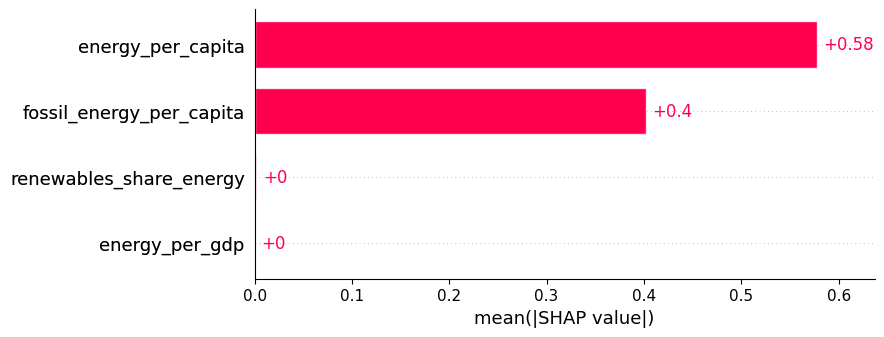

In [229]:
shap.plots.bar(shap_values)

In [230]:
def predict_drivers_for_year(year, driver_models):
    """
    Predict energy drivers for a given year using trained driver models.
    """
    year_df = pd.DataFrame({"year": [year]})
    
    drivers_pred = {}
    for driver, model in driver_models.items():
        drivers_pred[driver] = float(model.predict(year_df)[0])
    
    return drivers_pred


In [231]:
def predict_co2_from_drivers(drivers_pred, co2_model):
    """
    Predict CO₂ per capita from projected drivers.
    """
    X = pd.DataFrame([drivers_pred])
    co2_pred = float(co2_model.predict(X)[0])
    return co2_pred, X


In [232]:
def compute_shap_contributions(X, explainer, feature_names):
    """
    Compute SHAP contributions for a single prediction.
    """
    shap_values = explainer(X)
    
    contributions = {
        feature: float(shap_values.values[0][i])
        for i, feature in enumerate(feature_names)
    }
    
    base_value = float(shap_values.base_values[0])
    
    return contributions, base_value


In [233]:
def predict_co2_for_year(
    year,
    driver_models,
    co2_model,
    explainer,
    feature_names
):
    """
    End-to-end prediction:
    year → drivers → CO₂ → factor contributions
    """
    # 1. Predict drivers
    drivers_pred = predict_drivers_for_year(year, driver_models)
    
    # 2. Predict CO₂
    co2_pred, X = predict_co2_from_drivers(drivers_pred, co2_model)
    
    # 3. Explain prediction
    contributions, base_value = compute_shap_contributions(
        X, explainer, feature_names
    )
    
    # 4. Package output
    result = {
        "year": year,
        "predicted_co2_per_capita": co2_pred,
        "baseline_co2": base_value,
        "projected_drivers": drivers_pred,
        "factor_contributions": contributions
    }
    
    return result


In [234]:
feature_names = features  # from Section 6

result = predict_co2_for_year(
    year=2030,
    driver_models=driver_models,
    co2_model=co2_model,
    explainer=explainer,
    feature_names=feature_names
)

result


{'year': 2030,
 'predicted_co2_per_capita': 1.882215313873282,
 'baseline_co2': 0.6589565217391304,
 'projected_drivers': {'energy_per_capita': 7000.00498769572,
  'fossil_energy_per_capita': 6411.930137131247,
  'renewables_share_energy': 5.2489831123688475,
  'energy_per_gdp': 1.1567053431357466},
 'factor_contributions': {'energy_per_capita': 0.7157730053545911,
  'fossil_energy_per_capita': 0.503698022082736,
  'renewables_share_energy': 0.003787764696824548,
  'energy_per_gdp': -0.0}}

In [235]:
# ============================================================================
# DIAGNOSTIC: Check what driver models are predicting
# ============================================================================

print("=" * 80)
print("CHECKING DRIVER MODEL PREDICTIONS")
print("=" * 80)

# Check predictions for multiple years
test_years = [2015, 2020, 2025, 2030, 2035, 2040, 2050]

print("\nDriver model predictions:")
for driver in features:
    print(f"\n{driver}:")
    predictions = [driver_models[driver].predict([[year]])[0] for year in test_years]
    
    for year, pred in zip(test_years, predictions):
        print(f"  {year}: {pred:10.4f}")
    
    # Check if predictions change
    pred_range = max(predictions) - min(predictions)
    pred_mean = np.mean(predictions)
    change_pct = (pred_range / abs(pred_mean)) * 100
    
    print(f"  Range: {pred_range:.4f} ({change_pct:.2f}% of mean)")
    
    if change_pct < 1.0:  # Less than 1% change
        print(f"  ⚠️  WARNING: Nearly constant predictions!")

# Check slopes
print("\n" + "=" * 80)
print("Driver model slopes:")
for driver in features:
    slope = driver_models[driver].coef_[0]
    print(f"{driver:30s}: {slope:15.10f}")
    if abs(slope) < 0.01:
        print(f"  ⚠️  Very small slope!")

CHECKING DRIVER MODEL PREDICTIONS

Driver model predictions:

energy_per_capita:
  2015:  5484.4481
  2020:  5989.6338
  2025:  6494.8194
  2030:  7000.0050
  2035:  7505.1906
  2040:  8010.3762
  2050:  9020.7474
  Range: 3536.2993 (50.00% of mean)

fossil_energy_per_capita:
  2015:  5013.0265
  2020:  5479.3277
  2025:  5945.6289
  2030:  6411.9301
  2035:  6878.2313
  2040:  7344.5326
  2050:  8277.1350
  Range: 3264.1085 (50.38% of mean)

renewables_share_energy:
  2015:     6.5739
  2020:     6.1323
  2025:     5.6906
  2030:     5.2490
  2035:     4.8073
  2040:     4.3657
  2050:     3.4824
  Range: 3.0916 (59.62% of mean)

energy_per_gdp:
  2015:     1.1647
  2020:     1.1620
  2025:     1.1594
  2030:     1.1567
  2035:     1.1541
  2040:     1.1514
  2050:     1.1461
  Range: 0.0186 (1.60% of mean)

Driver model slopes:
energy_per_capita             :  101.0371229506
fossil_energy_per_capita      :   93.2602423021
renewables_share_energy       :   -0.0883306469
energy_per_gdp

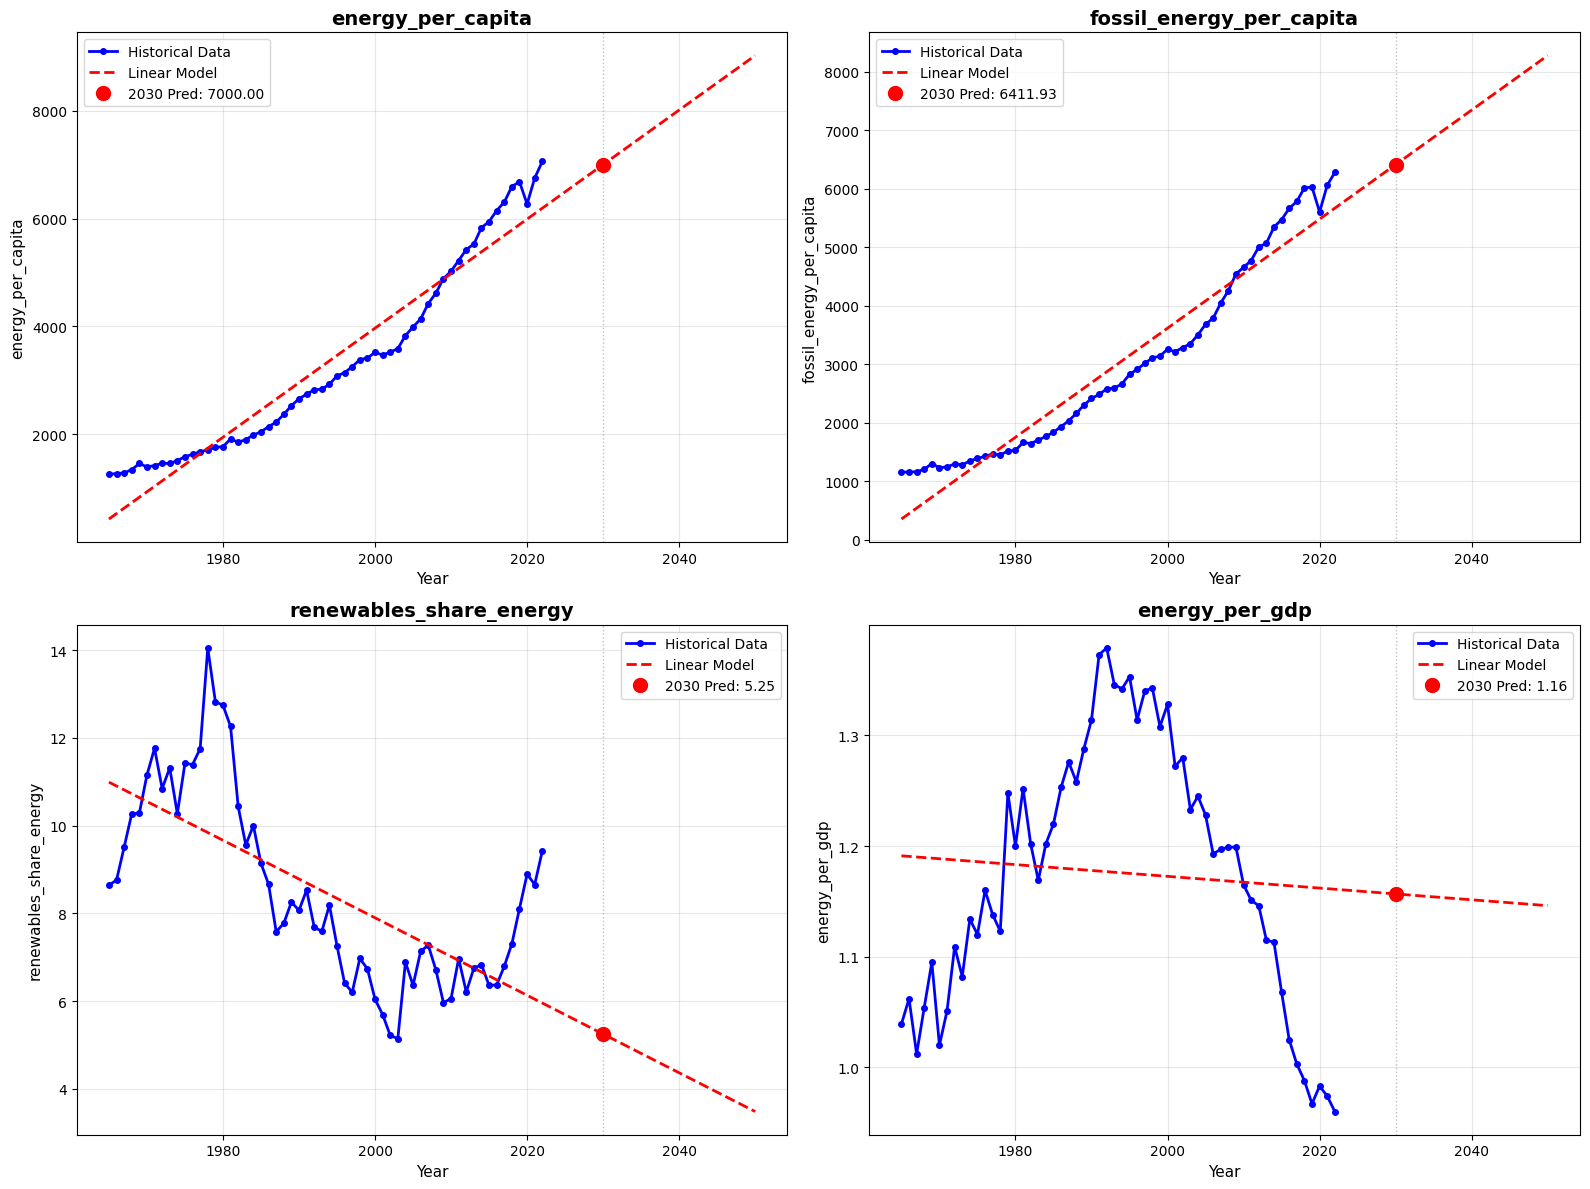


✓ If the red line is flat, that feature won't contribute to predictions!


In [236]:
# ============================================================================
# VISUALIZE: See what's happening
# ============================================================================

import matplotlib.pyplot as plt

# Create merged_df if it doesn't exist
if 'merged_df' not in locals():
    merged_df = pd.merge(co2_india_final, energy_india_final, on='year', how='inner')

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

for idx, feature in enumerate(features):
    ax = axes[idx // 2, idx % 2]
    
    # Historical data (grouped by year)
    yearly_avg = merged_df.groupby('year')[feature].mean()
    yearly_avg.plot(ax=ax, marker='o', label='Historical Data', 
                    linewidth=2, markersize=4, color='blue')
    
    # Model predictions
    future_years = list(range(int(merged_df['year'].min()), 2051))
    predictions = [driver_models[feature].predict([[y]])[0] for y in future_years]
    ax.plot(future_years, predictions, 'r--', label='Linear Model', linewidth=2)
    
    # Highlight 2030
    pred_2030 = driver_models[feature].predict([[2030]])[0]
    ax.axvline(2030, color='gray', linestyle=':', alpha=0.5, linewidth=1)
    ax.plot(2030, pred_2030, 'ro', markersize=10, 
            label=f'2030 Pred: {pred_2030:.2f}', zorder=5)
    
    ax.set_title(f'{feature}', fontsize=14, fontweight='bold')
    ax.set_xlabel('Year', fontsize=11)
    ax.set_ylabel(feature, fontsize=11)
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ If the red line is flat, that feature won't contribute to predictions!")